**LAB-01**




In [ ]:
#Lab-1
#Create a Neuron Model and Work the activation Function
import numpy as np
class NeuralNetwork:
  def __init__(self,input_size):
    self.weights=np.random.randn(input_size)
    self.bias=np.random.randn()
  def activation_function(self,x,func):
    y=self.weights*x+self.bias
    return func(y)
def sigmoid(x):
  return 1/(1+np.exp(-x))
def relu(x):
  return np.maximum(0,x)
x=[1,2,3,4]
Neuron=NeuralNetwork(4)
Neuron.activation_function(x,relu)

array([0.08270843, 0.        , 0.86332629, 0.        ])

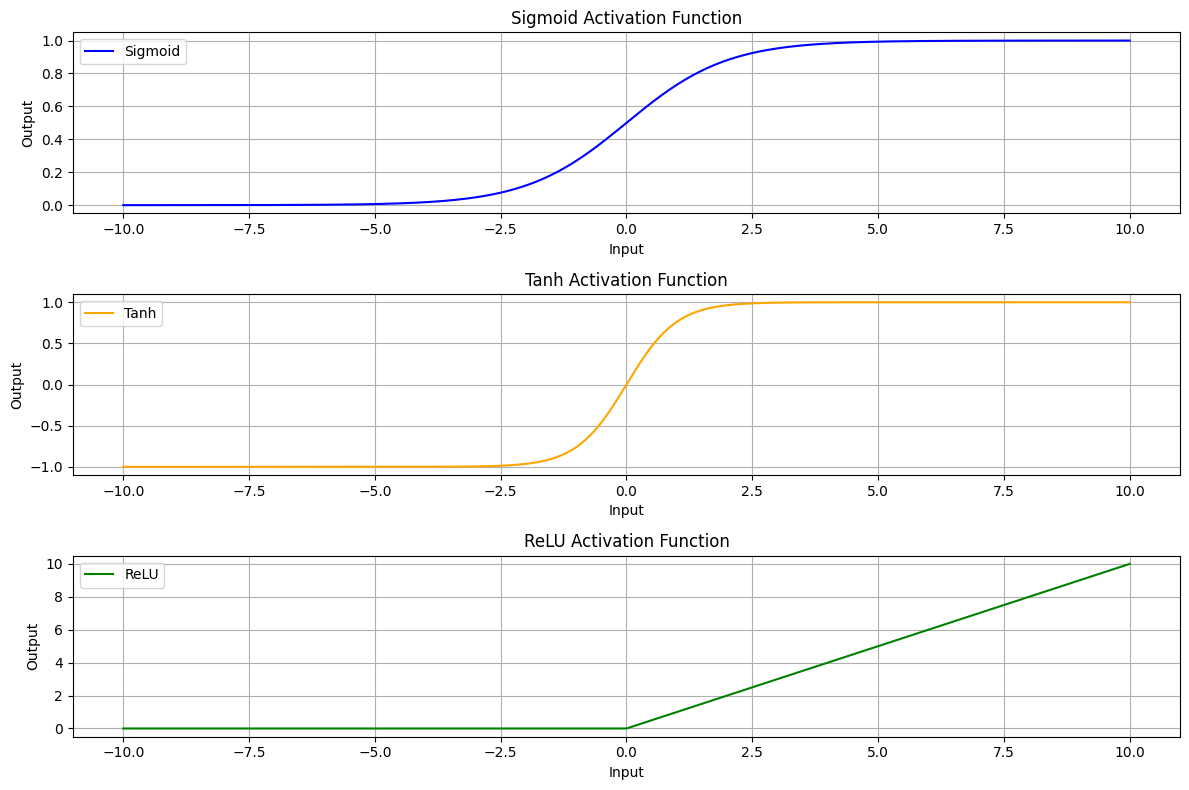

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)



x = np.linspace(-10, 10, 500)

# Compute function outputs
sigmoid_y = sigmoid(x)
tanh_y = tanh(x)
relu_y = relu(x)

# Plotting
plt.figure(figsize=(12, 8))

# Sigmoid
plt.subplot(3, 1, 1)
plt.plot(x, sigmoid_y, label="Sigmoid", color='blue')
plt.title("Sigmoid Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.legend()

# Tanh
plt.subplot(3, 1, 2)
plt.plot(x, tanh_y, label="Tanh", color='orange')
plt.title("Tanh Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.legend()

# ReLU
plt.subplot(3, 1, 3)
plt.plot(x, relu_y, label="ReLU", color='green')
plt.title("ReLU Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

**Lab-2**

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, max_epochs=1000):
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs

    def activation(self, z):
        # Step function for binary classification
        return 1 if z >= 0 else 0

    def train(self, X, y):
        for epoch in range(self.max_epochs):
            error_count = 0
            for i in range(len(X)):
                # Compute weighted sum
                z = np.dot(X[i], self.weights) + self.bias
                # Prediction
                y_pred = self.activation(z)
                # Update weights and bias if prediction is incorrect
                if y_pred != y[i]:
                    error_count += 1
                    update = self.learning_rate * (y[i] - y_pred)
                    self.weights += update * X[i]
                    self.bias += update
            # Stop if no errors
            if error_count == 0:
                print(f"Converged after {epoch + 1} epochs.")
                break

    def predict(self, X):
        # Predict for each input sample
        return [self.activation(np.dot(x, self.weights) + self.bias) for x in X]

# Example usage
if __name__ == "__main__":
    # Input data: logical OR operation
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 1, 1, 1])  # OR operation output

    # Create and train perceptron
    perceptron = Perceptron(input_size=2, learning_rate=0.1, max_epochs=100)
    perceptron.train(X, y)

    # Test the perceptron
    print("Predictions:", perceptron.predict(X))


Converged after 4 epochs.
Predictions: [0, 1, 1, 1]


**Lab=03**

In [ ]:
import numpy as np
def sigmoid(x): return 1 / (1 + np.exp(-x))
def tanh(x): return np.tanh(x)
def tanh_derivative(x): return 1 - np.tanh(x) ** 2
def forward(X, w1, w2, b1, b2):
    h_out = tanh(np.dot(X, w1) + b1)
    output = sigmoid(np.dot(h_out, w2) + b2)
    return h_out, output

def train(X, y, epochs=100, lr=0.5):
    np.random.seed(42) # For reproducibility
    w1 = np.random.randn(2, 2) * 0.1
    w2 = np.random.randn(2, 1) * 0.1
    b1 = np.zeros((1, 2))
    b2 = np.zeros((1, 1))
    for _ in range(epochs):
        h_out, output = forward(X, w1, w2, b1, b2)
        output_error = output - y
        hidden_error = np.dot(output_error, w2.T) * tanh_derivative(h_out)
        w2 -= lr * np.dot(h_out.T, output_error)
        b2 -= lr * np.sum(output_error, axis=0, keepdims=True)
        w1 -= lr * np.dot(X.T, hidden_error)
        b1 -= lr * np.sum(hidden_error, axis=0, keepdims=True)
    return w1, w2, b1, b2

def test(X, w1, w2, b1, b2):
    _, output = forward(X, w1, w2, b1, b2)
    return (output > 0.5).astype(int)


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
w1, w2, b1, b2 = train(X, y, epochs=10000, lr=0.5)
predictions = test(X, w1, w2, b1, b2)
print("Input Data:")
print(X)
print("Predicted Outputs:")
print(predictions)
print("Actual Outputs:")
print(y)

Input Data:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Predicted Outputs:
[[0]
 [1]
 [1]
 [0]]
Actual Outputs:
[[0]
 [1]
 [1]
 [0]]


**Lab-04**

Training with Gradient Descent...
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 0.6480 - loss: 0.6923
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6520 - loss: 0.6913
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6560 - loss: 0.6902
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6560 - loss: 0.6892
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6600 - loss: 0.6882
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6660 - loss: 0.6873
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6700 - loss: 0.6863
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6700 - loss: 0.6854
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6680 - loss: 0.6845
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6700 - loss: 0.6836
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6680 - loss: 0.6827
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step 

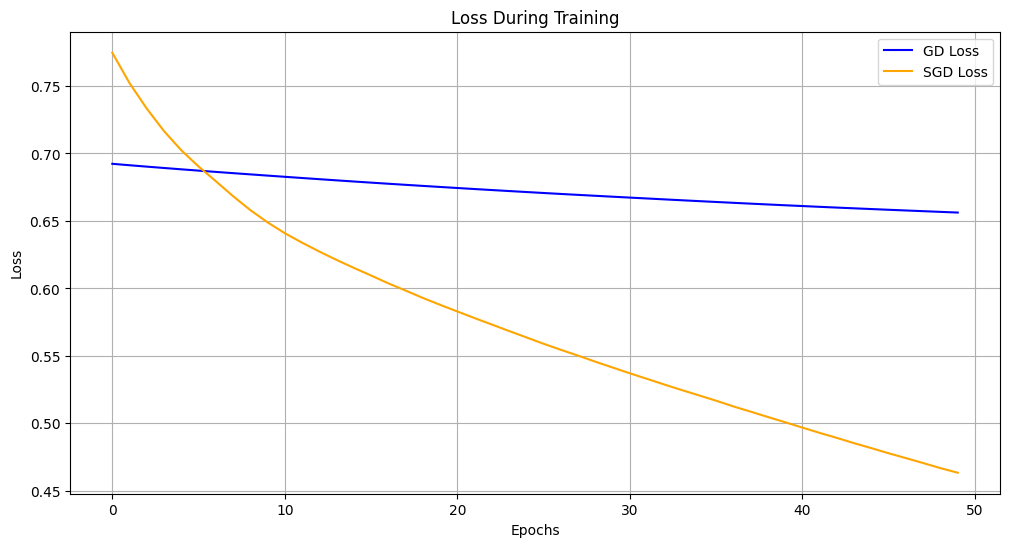

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Data generation for binary classification
np.random.seed(42)
X = np.random.randn(500, 2)
Y = (X[:, 0] * X[:, 1] > 0).astype(int)  # Binary labels

# Model definition
def build_model():
    model = Sequential([
        Dense(10, input_dim=2, activation='relu'),  # Hidden layer 1
        Dense(5, activation='relu'),               # Hidden layer 2
        Dense(1, activation='sigmoid')             # Output layer (binary classification)
    ])
    return model

# Training with Gradient Descent
print("Training with Gradient Descent...")
model_gd = build_model()
model_gd.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

history_gd = model_gd.fit(X, Y, epochs=50, batch_size=len(X), verbose=1)  # Full-batch GD (batch_size = dataset size)

# Training with Stochastic Gradient Descent
print("\nTraining with Stochastic Gradient Descent...")
model_sgd = build_model()
model_sgd.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

history_sgd = model_sgd.fit(X, Y, epochs=50, batch_size=32, verbose=1)  # Mini-batch SGD (batch_size=32)

# Evaluation
_, acc_gd = model_gd.evaluate(X, Y, verbose=0)
_, acc_sgd = model_sgd.evaluate(X, Y, verbose=0)

print(f"\nAccuracy with Gradient Descent: {acc_gd * 100:.2f}%")
print(f"Accuracy with Stochastic Gradient Descent: {acc_sgd * 100:.2f}%")

# Plot Loss Curves
plt.figure(figsize=(12, 6))

# Loss for Gradient Descent
plt.plot(history_gd.history['loss'], label='GD Loss', color='blue')

# Loss for Stochastic Gradient Descent
plt.plot(history_sgd.history['loss'], label='SGD Loss', color='orange')

plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


**Lab-05**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Generating synthetic data for multitask learning
np.random.seed(42)
X = np.random.randn(1000, 10)  # 10 features

# Task 1: Binary classification
Y1 = (np.sum(X, axis=1) > 0).astype(int)

# Task 2: Regression
Y2 = np.sum(X, axis=1) + np.random.normal(0, 0.1, size=(1000,))

# Splitting data into training and validation
split = int(0.8 * len(X))
X_train, X_val = X[:split], X[split:]
Y1_train, Y1_val = Y1[:split], Y1[split:]
Y2_train, Y2_val = Y2[:split], Y2[split:]

# Define the multitask model
def build_multitask_model():
    inputs = Input(shape=(10,))
    x = Dense(64, activation='relu')(inputs)
    x = Dropout(0.5)(x)  # Dropout for regularization
    x = Dense(32, activation='relu')(x)

    # Task 1: Binary classification output
    task1_output = Dense(1, activation='sigmoid', name='task1_output')(x)

    # Task 2: Regression output
    task2_output = Dense(1, name='task2_output')(x)

    model = Model(inputs=inputs, outputs=[task1_output, task2_output])
    return model

# Build and compile the model
model = build_multitask_model()
optimizer = Adam(learning_rate=0.01, clipnorm=1.0)  # Gradient clipping applied here
model.compile(
    optimizer=optimizer,
    loss={
        'task1_output': 'binary_crossentropy',  # Loss for classification
        'task2_output': 'mse'  # Loss for regression
    },
    metrics={
        'task1_output': 'accuracy',  # Metric for classification
        'task2_output': 'mae'  # Metric for regression
    }
)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train,
    {'task1_output': Y1_train, 'task2_output': Y2_train},  # Training data for both tasks
    validation_data=(X_val, {'task1_output': Y1_val, 'task2_output': Y2_val}),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
results = model.evaluate(X_val, {'task1_output': Y1_val, 'task2_output': Y2_val}, verbose=0)
print("\nEvaluation Results:")
print(f"Task 1 (Binary Classification) - Loss: {results[1]:.4f}, Accuracy: {results[3]:.4f}")
print(f"Task 2 (Regression) - Loss: {results[2]:.4f}, MAE: {results[4]:.4f}")


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 6.7875 - task1_output_accuracy: 0.6355 - task1_output_loss: 0.5880 - task2_output_loss: 6.1995 - task2_output_mae: 1.9110 - val_loss: 0.7526 - val_task1_output_accuracy: 0.9500 - val_task1_output_loss: 0.2512 - val_task2_output_loss: 0.4832 - val_task2_output_mae: 0.5048
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3405 - task1_output_accuracy: 0.9303 - task1_output_loss: 0.2306 - task2_output_loss: 1.1100 - task2_output_mae: 0.7983 - val_loss: 0.6229 - val_task1_output_accuracy: 0.9750 - val_task1_output_loss: 0.1527 - val_task2_output_loss: 0.4370 - val_task2_output_mae: 0.4842
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9709 - task1_output_accuracy: 0.9558 - task1_output_loss: 0.1484 - task2_output_loss: 0.8224 - task2_output_mae: 0.6660 - val_loss: 0.2586 - val_task1_output_accuracy: 0.9750 - val_task1_output_loss: 0.1102 - val_task2_output_loss: 0.1578 - val_task2_output_mae: 0.2775
Epoch 4/5

**Lab-07**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.8677 - loss: 0.4200 - val_accuracy: 0.9856 - val_loss: 0.0432
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9757 - loss: 0.0812 - val_accuracy: 0.9897 - val_loss: 0.0320
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9835 - loss: 0.0564 - val_accuracy: 0.9903 - val_loss: 0.0299
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9859 - loss: 0.0449 - val_accuracy: 0.9922 - val_loss: 0.0242
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9892 - loss: 0.0373 - val_accuracy: 0.9928 - val_loss: 0.0250
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9903 - loss: 0.0315 - val_accuracy: 0.9912 - val_loss: 0.0256
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9914 - loss: 0.0290 - val_accuracy: 0.9927 - val_loss: 0.0214
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9920 -

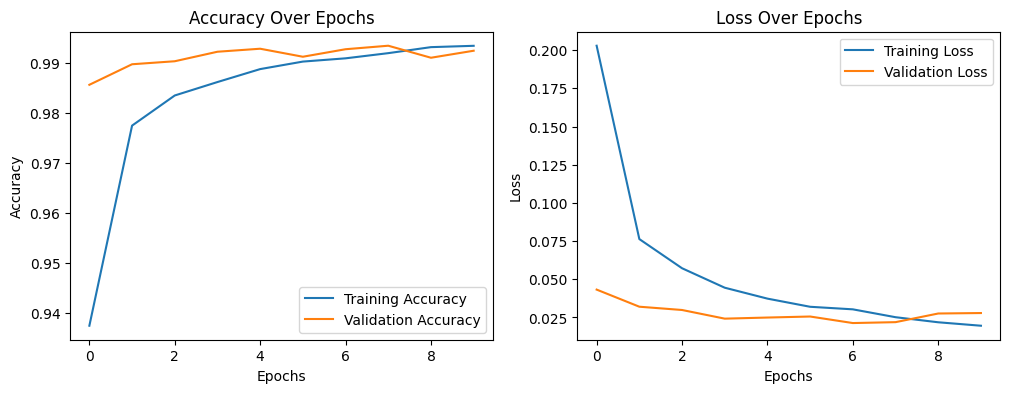

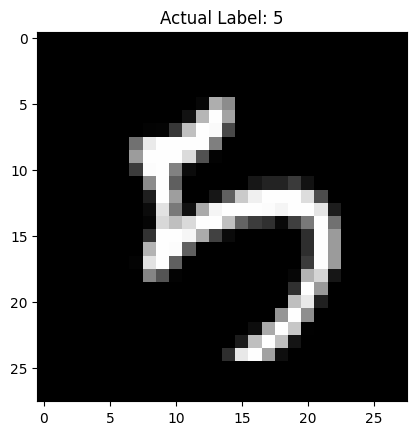

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted Label: 5


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Step 2: Preprocess the data
# Normalize the pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data to add the channel dimension (required for CNNs)
X_train = X_train.reshape(-1, 28, 28, 1)  # (samples, height, width, channels)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Step 3: Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Step 4: Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 5: Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)

# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 7: Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Step 8: Make predictions (Optional)
# Randomly pick an image from the test set and predict its label
import numpy as np
random_idx = np.random.randint(0, len(X_test))
plt.imshow(X_test[random_idx].reshape(28, 28), cmap='gray')
plt.title("Actual Label: " + str(y_test[random_idx].argmax()))
plt.show()

prediction = model.predict(X_test[random_idx].reshape(1, 28, 28, 1))
print("Predicted Label:", prediction.argmax())


**Lab-08**

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 230s 583ms/step - accuracy: 0.5236 - loss: 0.6880 - val_accuracy: 0.7354 - val_loss: 0.5581
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 285s 644ms/step - accuracy: 0.6377 - loss: 0.6059 - val_accuracy: 0.7954 - val_loss: 0.4739
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 240s 588ms/step - accuracy: 0.6503 - loss: 0.6186 - val_accuracy: 0.6028 - val_loss: 0.6185
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 226s 579ms/step - accuracy: 0.7335 - loss: 0.4785 - val_accuracy: 0.8689 - val_loss: 0.3231
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 285s 639ms/step - accuracy: 0.9234 - loss: 0.2185 - val_accuracy: 0.8734 - val_loss: 0.3220
Test Accuracy: 87.34%


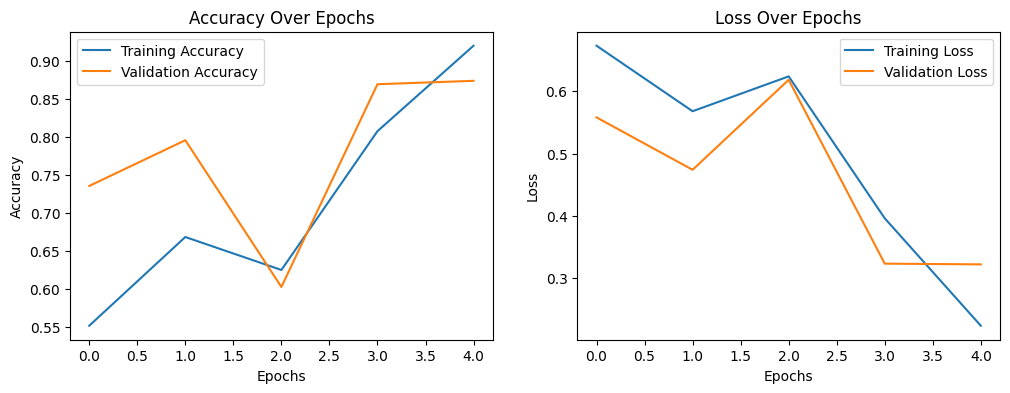

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Review Sentiment: Negative
Actual Sentiment: Negative


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, GRU, Dropout
import matplotlib.pyplot as plt

# Step 1: Load the IMDB dataset
vocab_size = 10000  # Number of unique words to consider
max_length = 200  # Maximum review length
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Step 2: Preprocess the data
# Pad sequences to ensure uniform input length
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

# Step 3: Define the RNN model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),  # Embedding layer
    LSTM(128, return_sequences=False),  # LSTM layer (can be replaced with GRU or SimpleRNN)
    Dropout(0.5),  # Dropout for regularization
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 4: Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 5: Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=64,
    verbose=1
)

# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 7: Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Step 8: Test prediction
review_idx = 0  # Index of a review in the test set
prediction = model.predict(X_test[review_idx].reshape(1, -1))
print(f"Review Sentiment: {'Positive' if prediction[0] > 0.5 else 'Negative'}")
print(f"Actual Sentiment: {'Positive' if y_test[review_idx] == 1 else 'Negative'}")


**Lab-10**

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2015-01-02  24.347176  27.332500  27.860001  26.837500  27.847500  212818400
2015-01-05  23.661268  26.562500  27.162500  26.352501  27.072500  257142000
2015-01-06  23.663498  26.565001  26.857500  26.157499  26.635000  263188400
2015-01-07  23.995308  26.937500  27.049999  26.674999  26.799999  160423600
2015-01-08  24.917271  27.972500  28.037500  27.174999  27.307501  237458000
Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0255
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 4.2823e-04
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 4.2111e-04
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 4.2665e-04
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 4.3030e-04
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 

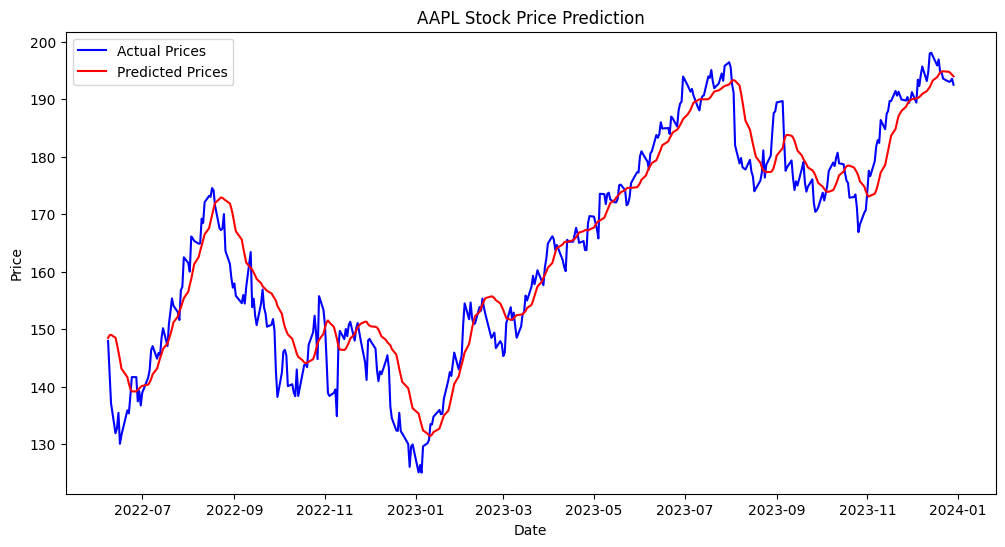

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Step 1: Download data from Yahoo Finance
ticker = "AAPL"  # Example: Apple Inc.
start_date = "2015-01-01"
end_date = "2023-12-31"

# Fetch stock data
data = yf.download(ticker, start=start_date, end=end_date)
print(data.head())

# Step 2: Preprocess the data
# Use 'Close' prices for prediction
close_prices = data['Close'].values.reshape(-1, 1)

# Normalize the data to range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Split into training and testing datasets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Number of days to look back
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Step 3: Build and train the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Step 4: Make predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)  # Rescale to original range
actual_prices = scaler.inverse_transform(y_test)

# Step 5: Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(actual_prices):], actual_prices, color='blue', label='Actual Prices')
plt.plot(data.index[-len(predicted_prices):], predicted_prices, color='red', label='Predicted Prices')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
